* 인공지능은 함수적 원리를 이용

- 신경 --입력--> 신경 --출력--> 신경


* y = ax

- vector(수면시간, 운동시간, 칼로리 섭취량)  x  "matrix(함수)"  =  vector(체중, 혈압)


* 입력-출력 사이에 층위를 더할 수도 있다.


* 인공지능의 대표 선수 인공 신경망

어떤 입력을 출력으로 예측하는 함수

입력과 출력은 벡터

함수는 행렬

데이터만 있으면 행렬을 추정해낼 수 있음

이 행렬 자체가 인공지능임


# import modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

* 중요 모듈 3개

* numpy는 행렬.

# data preparation and visualization

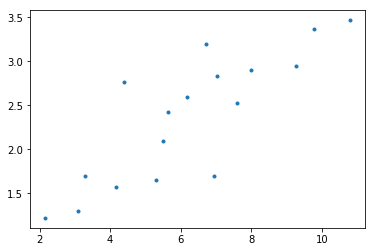

In [7]:
data = pd.read_csv('regression.csv')
X = data ['X']
Y = data ['Y']
plt.plot(X,Y,'.')

* 선(y = ax+b) 를 구한다는 것? 

--> 저 점들을 지나치는 선 하나를 만드는 것임. 

-->한 차원 더 높아진 경우 (x 1개 y 1개) --> 2차로 하나의 무한대로 나아가는 선 

--> x가 2개, y가 1개 --> 3차의 경우 3차원상의 클라우드로 존재 


* a,b,c값을 구할 때 어떤 의미? 

--> y = ax1+bx2+c 무한대로 나아가는 평면을 만드는 것

--> 2차원 상에서의 데이터를 설명해주는 모델 = 1차원

--> 3차원 상에서의 데이터를 설명해주는 모델 = 2차원 


**한 차원씩 낮춰서 해당 패턴을 알아냄.

--> x는 3개 y는 1개 = 4차원상 설명, 모델은 3차이나 직접적으로 이를 구하는 것은 힘듦. 

--> x 1개 y 1개/ x 2개 y 1개 의 경우만 가능. 그것을 visualize하고 확장하는 것 


* a구하고, b구하고 .. 이런식의 프로세스가 머신프로세스임

# create model

* sequence: 모델의 모양을 정해주는 것. sequential한 모양을 만들어 준다. 

* add : 1은 y의 개수 input shape는 x의 개수. 

--> 둘 다 각 열마다 x,y하나씩 있었다는 것을 기억

--> 이를 통해 y =ax+b 형태를 만들어냄 (a,b의 값을 뽑아내는 것)

--> 위의 모델은 아직 형태만 만든것이지 무엇을 한 것은 아님. loss를 통해 오류값등을 보존해줌

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.compile(optimizer='sgd', loss='mse')

* 모든 종류의 입력 방식은 sequential

* 1은 y의 개수 input_shape은 x의 개수

* Dense(1 .. 출력부 shape=1은 입력부

--> y=ax+b를 만든 것. 간단한 인공신경망을 만든 것이다.

* loss = 출력부와 실제 정답값과의 차이. loss를 정의해주는 다양한 방법 중 한 가지.

* Dense: 입력이 몇개인가 출력이 몇개인가.. 등을 정해주는 것. 

* Dense(1)- 출력이 하나 input shape - 입력이 두개.

--> csv입력이 두개였다면 input shape 2 /// 결과 값이 두개였다면 dense(2) 

--> dense는 입력값과 출력값이 fully connected(dense) 되게 보인다. 

* model.add(Dense(1, input_shape = [1])) --> y = ax+b 를 만들어준다

* compile이라는 것은 내부적으로 parameter 차이 만큼을 반영해 주는 것.

* a,b 값을 훈련을 통해 들어간 입력 값 x와 실제 y값이 예상값 y와 넣지 않으면 달라질 수 없기 때문. 

* 이러한 차이를 반영시키기 위해 미분을 이용 --> 미분에 알고리즘 - advanced - sgd - greediandistance

* mse는 loss는 정답과 예측값의 차이를 단순히 반영을 하는 것이 아닌 square을 하고 mean값을 이용하는 방식 --> 이렇게 두개.

# train model

In [9]:
model.fit(X,Y)

17/17 [==============================] - 0s 29ms/sample - loss: 46.2683


* 총 데이터를 통해 계산되어 나옴

* a와 b를 훈련시켰다.

* park를 여러개.. --> epochs를 통해 회전수를 늘리는 것

* 처음 loss는 큰 차이가 났지만, 하면 할수록 loss가 작아지는 방식으로 훈련이 진행됨 = 완벽에 가깝게 수렴해 가고 있음

* 시스템을 만들고 출력값을 넣어보는 것이다.

# model prediction

In [10]:
x =[1, 2, 3, 4, 5, ,6, 7, 8, 9, 10]
y = model.predict(x)
plt.plot(X, Y, '.')
plt.plot(x, y, 'x')

SyntaxError: invalid syntax (<ipython-input-10-dce2eecea3ab>, line 1)

* 시스템을 만들고 출력이 어떻게 나올 지 모르는 상태에서 입력을 넣는 것.


* model predict는 a,b를 estimate를 통해 구함. 모델이 정해짐.

* x값을 넣으면 y값이 이렇게 나올 것이다 예측하는 것.

* x에 아무 숫자 넣어도 되는데 실제 입력, 출력 값과 일치함을 확인해보기 위해 1~10을 적음.

# what are a and b in y = ax + b?

* 하나밖에 없음--> layer가 1개 만들었으니까.--> 그 이상 여러개를 만들면 그것이 딥러닝

In [11]:
weight = model.layer[0].get_weights()
print(weight)

AttributeError: 'Sequential' object has no attribute 'layer'

--> 인공신경망 = 함수

* 값이 두 개가 나옴.

--> 첫번째가 a값 /// 두번째가 y절편 값(b) --> 상당히 b에 가깝다

* 스파이더 웹 하나가 layer. 

--> 스파이더 웹이 1개 밖에 없으니 0을 써준 것 (웹이 두개면 다르게 써야 함)

* 만약 x의 값이 두개면? x1 x2 면?

--> 화살표 개수가 3개 --> a, b, c 3개의 값을 찾아야 함. (입력은 2개, 밑의 상수 1은 정해져 있음 & 출력은 y로 정해져 있음)

* 출력값,입력값은 자유롭게 변경 가능 (csv에 들어가서 셀 파일을 수정)

* 입력 3개 출력 2개라면? 추정해야 되는 parameter의 개수는? 

* 쓸 데이터를 만들고 입력 구조와 출력 구조에 대해 생각. 입력 개수와 출력 개수를 통해 그림을 그리고 그것을 구현을 하는 것.